# Car sales Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading file from Github directly

car_sales = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv',  encoding='cp1252')

In [6]:
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [7]:
# shape of the Data
car_sales.shape

(9576, 10)

In [8]:
# information of data type
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [11]:
# description of the Data
car_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
price,9576.0,15633.317316,24106.523436,0.0,4999.0,9200.0,16700.0,547800.00
mileage,9576.0,138.862364,98.629754,0.0,70.0,128.0,194.0,999.00
engV,9142.0,2.646344,5.927699,0.1,1.6,2.0,2.5,99.99
year,9576.0,2006.605994,7.067924,1953.0,2004.0,2008.0,2012.0,2016.00


In [18]:
# checking Duplicated Rows and dropping it 
duplicates_row = car_sales[car_sales.duplicated()]
duplicates_row.shape[:1]

(113,)

In [19]:
# Dropping Duplicate rows 

car_sales = car_sales.drop_duplicates()

In [25]:
# Check out null Values 

car_sales.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           510
dtype: int64

In [35]:
# Filling the - Drive column by Mode

car_sales['drive'] = car_sales['drive'].fillna(car_sales['drive'].mode()[0])

In [38]:
# Filling the EngV column 
car_sales['engV'] = car_sales['engV'].fillna(car_sales['engV'].mode())

In [42]:
# Check - if milage is Zero , which is not possible at all
car_sales[car_sales['mileage'] == 0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
10,Nissan,20447.1540,crossover,0,1.2,Petrol,yes,2016,Qashqai,front
17,Mercedes-Benz,99999.0000,crossover,0,3.0,Petrol,yes,2016,GLE-Class,full
20,Land Rover,0.0000,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
21,Nissan,26033.5530,crossover,0,1.6,Diesel,yes,2016,X-Trail,full
24,BMW,65099.0000,crossover,0,2.0,Diesel,yes,2016,X5,full
...,...,...,...,...,...,...,...,...,...,...
9234,Hyundai,12800.7750,hatch,0,1.4,Petrol,yes,2016,Solaris,front
9268,Subaru,37500.0000,crossover,0,2.0,Diesel,yes,2016,Forester,full
9382,Suzuki,15486.9000,hatch,0,1.2,Petrol,yes,2016,Swift,front
9483,Opel,20120.0000,sedan,0,1.6,Diesel,yes,2016,Astra J,front


In [43]:
# check - weather price si zero

car_sales[car_sales['price'] == 0]

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full
92,Audi,0.0,crossover,0,3.0,Diesel,yes,2015,Q7,full
...,...,...,...,...,...,...,...,...,...,...
9019,Toyota,0.0,hatch,76,1.0,Petrol,yes,2007,Aygo,front
9025,Mercedes-Benz,0.0,crossover,1,3.0,Petrol,yes,2016,GLE-Class,full
9036,Ford,0.0,other,1,5.0,Petrol,yes,2014,Mustang,rear
9442,Renault,0.0,vagon,137,1.9,Diesel,yes,2008,Kangoo ïàññ.,front


In [44]:
# Note : There are many price and Milage rows are zero. 
    

/Users/pranab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


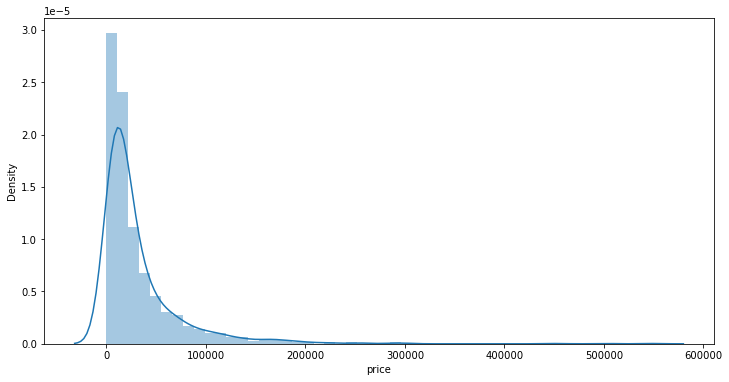

In [58]:
# Price Distribution
plt.figure(figsize=(12,6))
sns.distplot(car_sales.groupby(['price'],as_index=False)['price'].mean()['price'])
plt.show()

/Users/pranab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


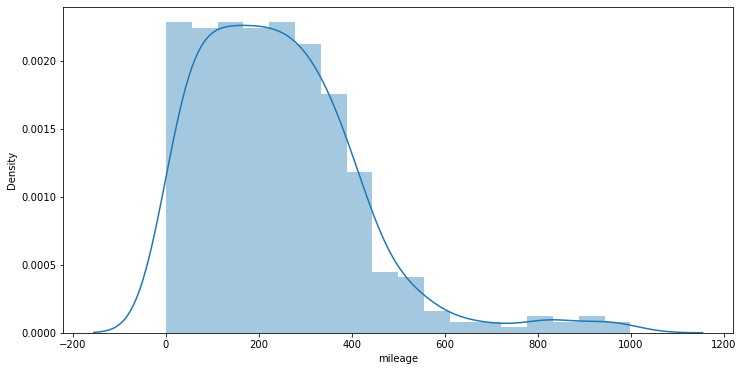

In [67]:
# Milage Distribution
plt.figure(figsize=(12,6))

sns.distplot(car_sales.groupby(['mileage'], as_index=False)['mileage'].mean()['mileage'])
plt.show()

In [68]:
# filling the zero values with median value

car_sales['price'] = car_sales['price'].fillna(car_sales['price'].mean())
car_sales['mileage'] = car_sales['mileage'].fillna(car_sales['mileage'].mean())

In [69]:
# Data Set is ready for Further Analysis

car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,front


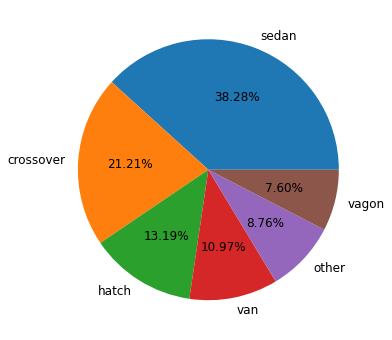

Note : Sedan is the most popular car followed by crossover. Vagan has the lowest.


In [79]:
# Understanding the Body Type
plt.figure(figsize=(12,6))
car_sales['body'].value_counts().plot.pie(autopct = '%2.2f%%', textprops={'fontsize':12})
plt.ylabel(None)
plt.show()

print('Note : Sedan is the most popular car followed by crossover. Vagan has the lowest.')

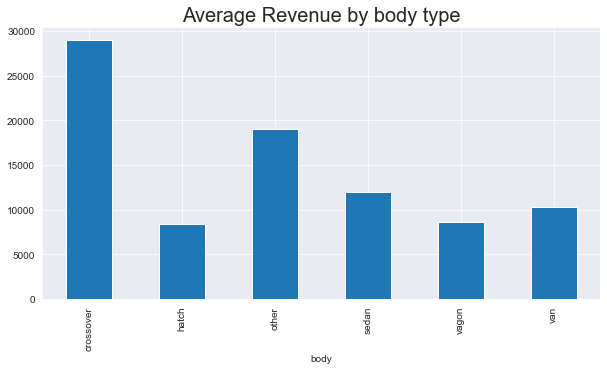

In [119]:
# Total Revenue by Body Type
sns.set_style('darkgrid')
car_sales.groupby('body')['price'].mean().plot(kind='bar', figsize=(10,5))

plt.title('Average Revenue by body type',size=20)
plt.show()

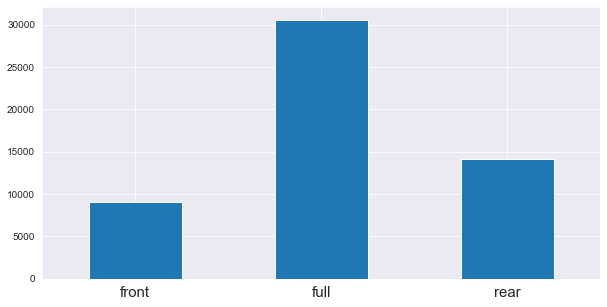

Note : Full Body type provides more revenue to the company


In [134]:
car_sales.groupby('drive')['price'].mean().plot(kind='bar',figsize=(10,5))
plt.xticks(size=15,rotation=360)
plt.xlabel(None)
plt.show()
print('=='*30)
print('Note : Full Body type provides more revenue to the company')

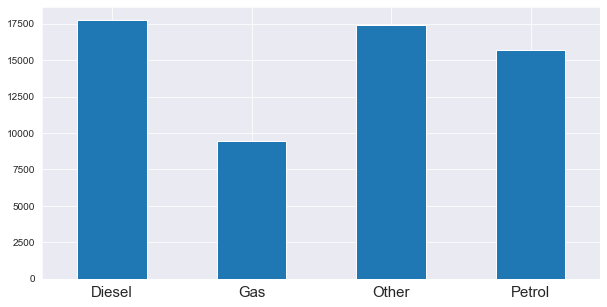

Note : Diesel & Other type Engines  provides more revenue to the company


In [136]:
car_sales.groupby('engType')['price'].mean().plot(kind='bar',figsize=(10,5))
plt.xticks(size=15,rotation=360)
plt.xlabel(None)
plt.show()
print('=='*30)
print('Note : Diesel & Other type Engines  provides more revenue to the company')

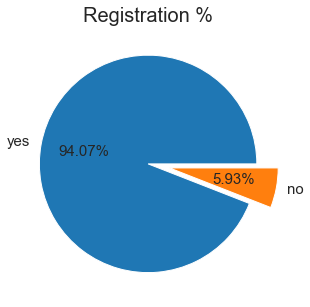

In [149]:
# How many Registration done?
plt.figure(figsize=(10,5))
car_sales['registration'].value_counts().plot.pie(autopct='%2.2f%%',explode=[0,.2], textprops={'fontsize':15})
plt.ylabel(None)
plt.title('Registration %', size=20)
plt.show()

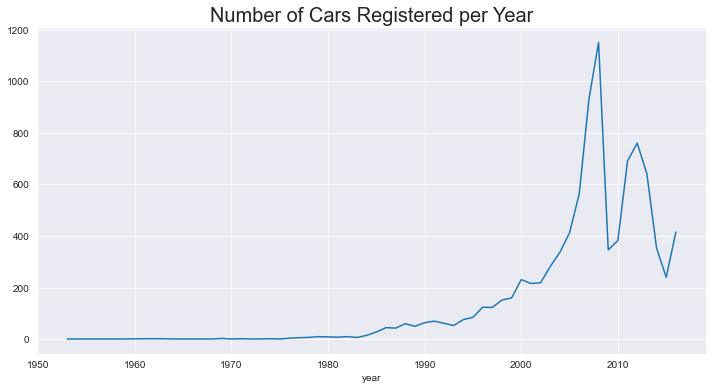

In [155]:
# How many Registrations per year?

car_sales.groupby(['year']).count()['registration'].plot(figsize=(12,6))
plt.title('Number of Cars Registered per Year',size=20)
plt.show()

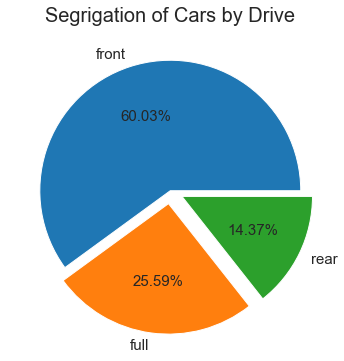

In [172]:
# Which is the more favourite drive car?

car_sales['drive'].value_counts().plot.pie(autopct='%2.2f%%',explode=[0,0.1,0.1],figsize=(12,6), textprops={'fontsize':15})

plt.title('Segrigation of Cars by Drive',size=20)
plt.ylabel(None)
plt.show()

<AxesSubplot:xlabel='year'>

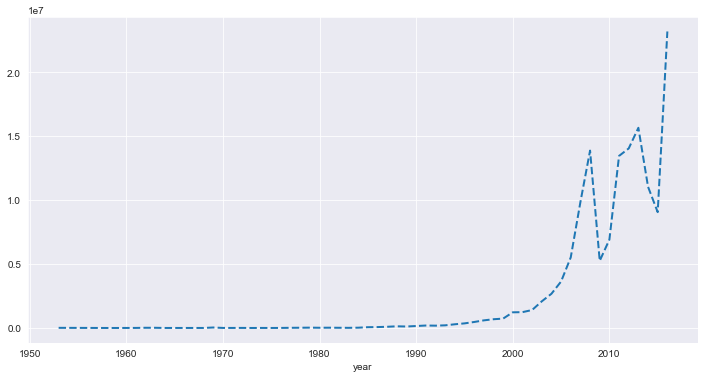

In [180]:
# Car Sales Revenue per Year?
plt.figure(figsize=(12,6))
car_sales.groupby('year').sum()['price'].plot(linestyle='--',linewidth=2)

<AxesSubplot:xlabel='year', ylabel='price'>

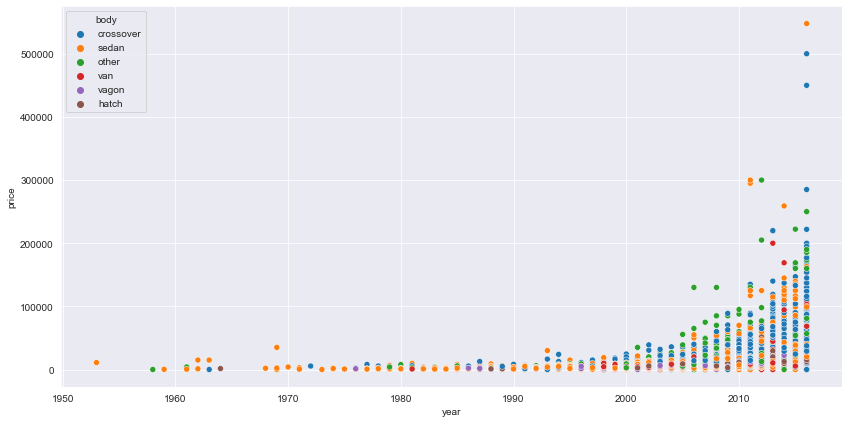

In [183]:
# Understang  car sales per year by body and price
plt.figure(figsize=(14,7))
sns.scatterplot(x='year',y='price',hue='body',data=car_sales)

In [80]:
car_sales


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
